Let's solve Poisson's equation over a unit square, $\Omega$.

We skip the derivation, and state the boundary conditions and the infinite dimensional weak form.

$$
\int_{\Omega} \nabla u \cdot \nabla v\,dx = \int_{\Omega} fv\, dx + \int_{\Gamma_{N}} v(\nabla u \cdot n)\,ds
$$

The Dirichlet boundary is given by $\Gamma_{D}$ over $x = 0$, $x = 1$.

The Neuman boundary is given by $\Gamma_{N}$, over $y = 0$, $y = 1$.

Let the normal derivative of $u$, $\nabla u \cdot n$, be $\sin(5x)$.

Let the forcing be $f = 10 \exp(-((x - 0.5)^{2} + (y - 0.5)^{2})/0.02)$

In [16]:
from dolfin import *

mesh = UnitSquareMesh(32,32)
V = FunctionSpace(mesh, "CG", 1)

def boundary(x):
    """
    checking if we are on the Dirichlet boundary
    """
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

# we can use DOLFIN_EPS for a small tolerance
u_D = Constant(0.0)
bc = DirichletBC(V, u_D, boundary)

u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

u = Function(V)
solve(a==L, u, bc)

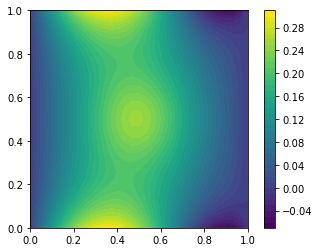

In [17]:
import matplotlib.pyplot as plt 
p = plot(u)
plt.colorbar(p)